# Packages

Tout d'abord, nous importons tous les paquets dont nous aurons besoin.

In [1]:
import numpy as np 
# le package fondamental pour le calcul de tableaux
#Il a également des fonctions pour travailler dans le domaine de l'algèbre linéaire


import pandas as pd 
# permettant la manipulation et l'analyse des données.


import seaborn as sns
# bibliothèque de visualisation de données basée sur matplotlib.
# Il fournit une interface de haut niveau pour dessiner des statistiques attrayantes et informatives.


import matplotlib.pyplot as plt
%matplotlib inline 
#Pour Jupyter notebook
# bibliothèque complète pour créer des visualisations statiques, animées et interactives.


from sklearn.model_selection import train_test_split
#Divisez des tableaux ou des matrices en sous-ensembles d'entraînement et de test.


from sklearn.preprocessing import StandardScaler
# fournit plusieurs fonctions pour transformer les vecteurs de caractéristiques.
# Nous en avons besoin pour la Standardisation


from functools import partial
# pour les fonctions d'ordre supérieur
# Renvoie un nouvel objet partiel


import tensorflow as tf
# Est une bibliothèque logicielle open source pour le calcul numérique haute performance.
# Développé à l'origine par des chercheurs et des ingénieurs 
# de l'équipe Google Brain au sein de l'organisation AI de Google


import tensorflow_probability as tfp
# Est une bibliothèque pour le raisonnement probabiliste et l'analyse statistique.
# permet l'intégration de méthodes probabilistes avec des réseaux profonds.

# from thermo.bnn import build_net, chunks, target_log_prob_fn_factory

from sklearn.metrics import r2_score
# implémente plusieurs fonctions de perte, de score et d'utilité pour mesurer les performances.
# Nous en avons besoin pour le calcul de R^2




import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
import keras
from keras.layers import Dense
#Pour les réseaux de neurones


import warnings
warnings.filterwarnings('ignore')
# Suppression des messages d'avertissement

    
import shutil
# Opérations sur les répertoires et les fichiers

C:\Users\zoula\AppData\Local\Temp\ipykernel_12724\1912643657.py:57: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Lecture des données en python

C'est une étape importante dans l'apprentissage automatique ! Nous devons avoir une bonne compréhension des données et du domaine avant d'essayer d'appliquer un algorithme d'apprentissage automatique.

In [30]:
voitures = pd.read_excel('Audinew.xlsx')
voitures.shape

(1827, 16)

Ce fichier contient 1827 données sur les prix des voitures.

In [31]:
# Suppression des lignes en double, s'il y en a
voitures = voitures.drop_duplicates()
print('Forme Après avoir supprimé les valeurs en double :', voitures.shape)

Forme Après avoir supprimé les valeurs en double : (1822, 16)


### Traitement des valeurs manquantes

Les valeurs manquantes sont traitées séparément pour chaque colonne.

Si une colonne contient plus de 30 % de données manquantes, le traitement des valeurs manquantes ne peut pas être effectué. Cette colonne doit être rejetée car il manque trop d'informations.

Voici des options pour traiter les valeurs manquantes dans les données.

- Supprimez les lignes de valeurs manquantes s'il n'y a que quelques enregistrements.

- Remplacez les valeurs manquantes par la valeur MEDIANE des variables continues

- Remplacez les valeurs manquantes par la valeur MODE pour les variables catégorielles

In [32]:
# Trouver combien de valeurs manquantes il y a pour chaque colonne.
voitures.isnull().sum()

Year               0
Name               0
price              2
Age                0
Miles              0
Exterior color     0
Interior color     0
NB-accidents       0
NB-Owners          0
Type of use        0
MPG:CTY            0
MPG:HWY            0
Engine:capacity    0
Engine:Type        0
 Transmission      0
Driven Type        0
dtype: int64

comme nous n'avons que deux valeurs manquantes dans la variable cible, nous décidons de supprimer.

#### Suppression des valeurs manquantes

In [33]:
voitures.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [34]:
# Vérifier à nouveau les valeurs manquantes après le traitement
voitures.isnull().sum()

Year               0
Name               0
price              0
Age                0
Miles              0
Exterior color     0
Interior color     0
NB-accidents       0
NB-Owners          0
Type of use        0
MPG:CTY            0
MPG:HWY            0
Engine:capacity    0
Engine:Type        0
 Transmission      0
Driven Type        0
dtype: int64

### Noms de colonne

In [35]:
voitures.columns

Index(['Year', 'Name', 'price', 'Age', 'Miles', 'Exterior color',
       'Interior color', 'NB-accidents', 'NB-Owners', 'Type of use', 'MPG:CTY',
       'MPG:HWY', 'Engine:capacity', 'Engine:Type', ' Transmission',
       'Driven Type'],
      dtype='object')

### Description des données

In [36]:
voitures.head(5)

,Year,Name,price,Age,Miles,Exterior color,Interior color,NB-accidents,NB-Owners,Type of use,MPG:CTY,MPG:HWY,Engine:capacity,Engine:Type,Transmission,Driven Type
0,2018,Audi Q3,28900.0,4,29390,Blue,Gray,0,1,Personal use,20,28,2.0,Inline-4 Gas Turbocharged,Automatic,FWD
1,2017,Audi Q7,29999.0,5,70439,Silver,Black,0,2,Fleet use,19,25,3.0,V-6 Gas Supercharged,Automatic,AWD
2,2019,Audi Q7,40890.0,3,26616,Black,Brown,0,1,Personal use,19,25,2.0,Inline-4 Gas Turbocharged,Automatic,AWD
3,2019,Audi Q5,30998.0,3,61183,Black,Black,0,2,Personal use,22,27,2.0,Inline-4 Gas Turbocharged,Automatic,AWD
4,2018,Audi Q3,24500.0,4,46218,White,Black,3,2,Personal use,20,28,2.0,Inline-4 Gas Turbocharged,Automatic,FWD


Price : Le prix de la voiture en dollars

Age : L'âge de la voiture en année

Miles : Combien de KMS la voiture a-t-elle été utilisée

Exterior color : Couleur extérieure de la voiture

Interior color : Couleur intérieure de la voiture

NB-accidents : Le nombre d'accidents de voiture

NB-Owners : Le nombre de propriétaires de la voiture

Type of use : The number of doors in the car

MPG:CTY : la consommation de la voiture (miles par gallon) en ville

MPG:HWY : la consommation de la voiture (miles par gallon) sur l'autoroute

Engine:capacity : Capacité du moteur en litres

'Engine:Type' : Type de moteur

'Transmission' : Boîte de vitesses

'Driven Type' : différents types de roues motrices

### Recherche de valeurs uniques pour chaque colonne

In [9]:
print(voitures['Name'].unique())
print(voitures['Type of use'].unique())
print(voitures['Engine:Type'].unique())
print(voitures[' Transmission'].unique())
print(voitures['Exterior color'].unique())
print(voitures['Interior color'].unique())
print(voitures['Age'].unique())
print(voitures['NB-accidents'].unique())
print(voitures['NB-Owners'].unique())
print(voitures['MPG:CTY'].unique())
print(voitures['MPG:HWY'].unique())
print(voitures['Engine:capacity'].unique())

['Audi Q3' 'Audi Q7' 'Audi Q5' 'Audi Q8' 'Audi RS Q8' 'Audi SQ5'
 'Audi SQ7' 'Audi SQ8']
[' Personal use' ' Fleet use']
['Inline-4 Gas Turbocharged' 'V-6 Gas Supercharged' 'V-6 Gas Turbocharged'
 'V-8 Gas Turbocharged' 'V-8 Hybrid Turbocharged'
 'V-6 Diesel Turbocharged' 'V-6 Gas' 'V-8 Gas']
['  Automatic' '  Manual']
['Blue ' 'Silver ' 'Black ' 'White ' 'Gray ' 'Red ' 'Orange ' 'Tan '
 'Green ' 'Brown ']
[' Gray ' ' Black ' ' Brown ' ' Beige ' ' Red ' ' Orange ']
[ 4  5  3  6  1  7  2  8  0  9 10 12 11 15 14]
[0 3 1 2]
[1 2 3 0 4 5 6]
[20 19 22 23 17 13 16 15 18 21 24 12 14]
[28 25 27 22 19 24 21 23 26 29 30 20 31 17]
[2.  3.  4.  3.2 3.6 4.2]


### Regardant la distribution de la variable cible

<AxesSubplot:>

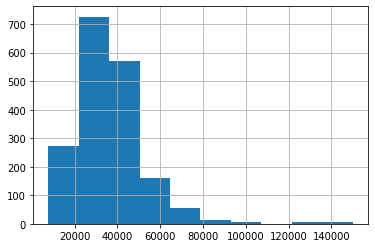

In [10]:
%matplotlib inline
voitures['price'].hist()

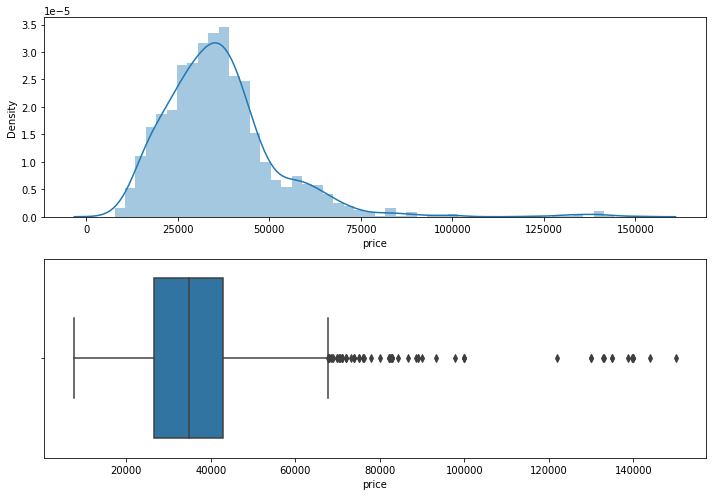

In [11]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(voitures['price'])
fig.add_subplot(2,1,2)
sns.boxplot(voitures['price'])
plt.tight_layout()

Une courbe en cloche est souhaitable, mais une asymétrie légèrement positive ou négative est également acceptable.
La distribution des données de la variable cible est satisfaisante pour aller plus loin. Il existe un nombre suffisant de lignes pour chaque type de valeurs à partir desquelles apprendre.

## Analyse visuelle des données

Variables catégorielles : Bar plot

Variables continues : Histogram

### Visualisez la distribution de toutes les variables de prédicteur catégoriel dans les données à l'aide de diagrammes à barres

Nous pouvons repérer une variable catégorielle dans les données en examinant les valeurs uniques qu'elles contiennent. En règle générale, une variable catégorielle contient moins de 20 valeurs uniques et il y a répétition de valeurs, ce qui signifie que les données peuvent être regroupées par ces valeurs uniques.

Sur la base de l'exploration des données de base ci-dessus, nous avons repéré treize prédicteurs catégoriels dans les données.

Prédicteurs catégoriels :
    
'Name', 'Age', 'Exterior color', 'Interior color', 'NB-accidents', 'NB-Owners', 'Type of use', 'MPG:CTY', 'MPG:HWY', 'Engine:capacity',  'Engine:Type', ' Transmission', 'Driven Type' .

Nous utilisons des graphiques à barres pour voir comment les données sont distribuées pour ces colonnes catégorielles.

In [43]:
# Tracer plusieurs graphiques à barres à la fois pour les variables catégorielles
''' Puisqu'il n'y a pas de fonction par défaut qui peut tracer des graphiques à barres 
    pour plusieurs colonnes à la fois.
    nous définissons notre propre fonction pour le même. '''

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [39]:
#voitures1 = voitures[['Age', 'Exterior color', 'Interior color','NB-accidents',
                     #'NB-Owners', 'Type of use','MPG:CTY', 'MPG:HWY', 
                     #'Engine:capacity','Name', 'Engine:Type', ' Transmission', 'Driven Type']]
#voitures1.hist( figsize=(20,15))
#plt.show()

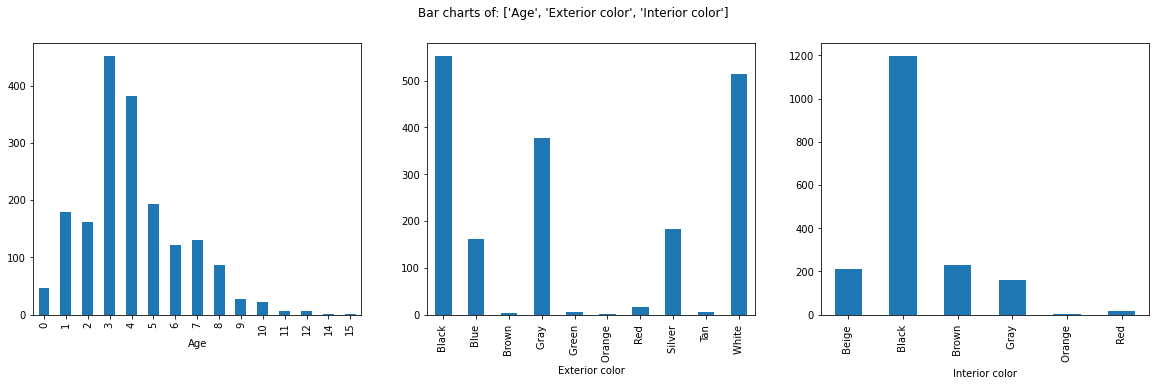

In [44]:
# Appel de la fonction
PlotBarCharts(inpData=voitures, colsToPlot=['Age', 'Exterior color', 'Interior color'])

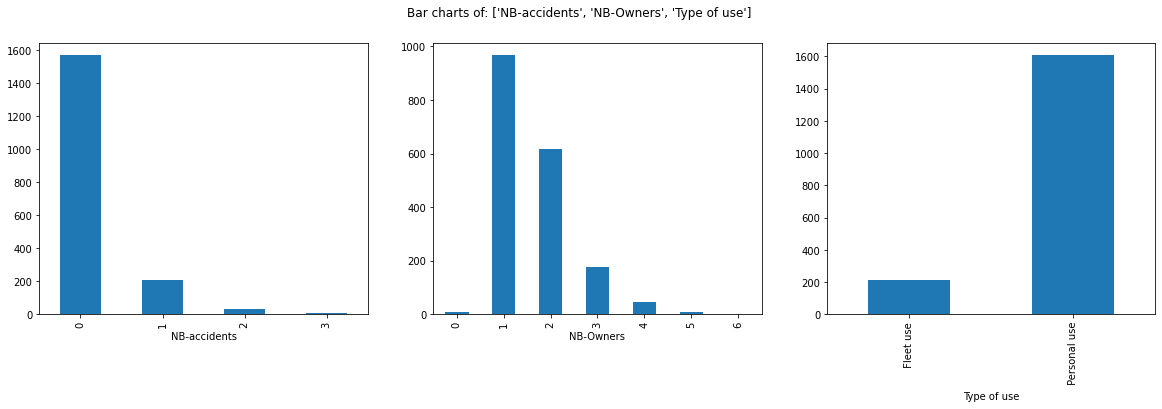

In [14]:
PlotBarCharts(inpData=voitures, colsToPlot=['NB-accidents', 'NB-Owners', 'Type of use'])

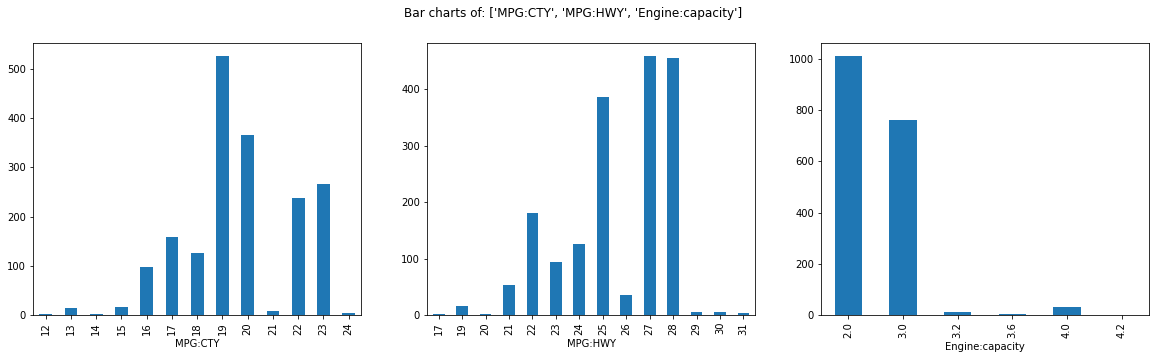

In [15]:
PlotBarCharts(inpData=voitures, colsToPlot=[ 'MPG:CTY', 'MPG:HWY', 'Engine:capacity'])

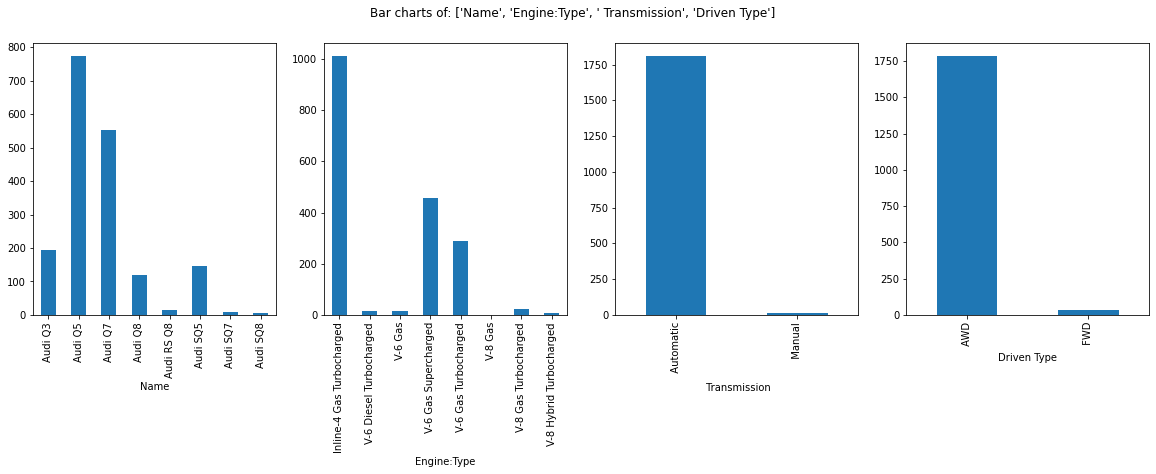

In [16]:
PlotBarCharts(inpData=voitures, colsToPlot=['Name', 'Engine:Type', ' Transmission', 'Driven Type'])

### Interprétation des graphiques à barres

Ces diagrammes à barres représentent les fréquences de chaque catégorie sur l'axe Y et les noms de catégorie sur l'axe X.

il y a des colonnes qui montre une distribution trop asymétrique où il n'y a qu'une seule barre dominante et les autres catégories sont présentes en très petit nombre. Ce type de colonnes peut ne pas être très utile dans l'apprentissage automatique. Nous confirmons cela dans la section d'analyse de corrélation et prenons un dernier appel pour sélectionner ou rejeter la colonne.

Variables qualitatives sélectionnées : Toutes les variables catégorielles sont sélectionnées pour une analyse plus approfondie.

### Visualisez la distribution de toutes les variables du prédicteur continu dans les données à l'aide d'histogrammes

Sur la base de l'exploration des données de base, une variable prédictive continue :

'Miles'

array([[<AxesSubplot:title={'center':'Miles'}>]], dtype=object)

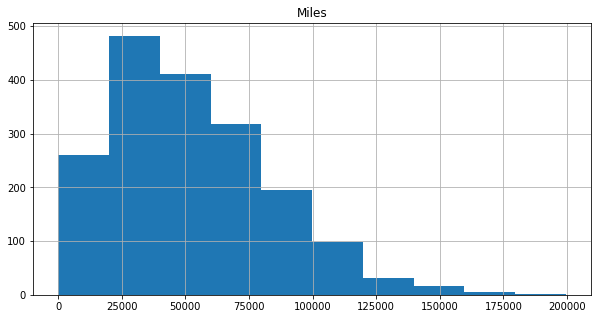

In [17]:
# Tracer des histogrammes de colonne 'Miles'
voitures.hist(['Miles'], figsize=(10,5))

### Interprétation de l'histogramme

L'histogramme nous montre la distribution des données pour une seule variable continue.

L'axe X montre l'intervalle de valeurs et l'axe Y représente le nombre de valeurs dans cet intervalle. Par exemple, dans l'histogramme ci-dessus de "Miles", il y a environ 400 lignes de données qui ont une valeur égale à 50000.

## Sélection des caractéristiques

Maintenant, le temps de choisir enfin les meilleures colonnes (Features) qui sont corrélées à la variable cible.

### Exploration des relations : continu VS continu  – diagrammes de dispersion

Lorsque la variable cible est continue et que le prédicteur est également continu, nous pouvons visualiser la relation entre les deux variables à l'aide d'un nuage de points et mesurer la force de la relation à l'aide de la valeur de corrélation de Pearson.

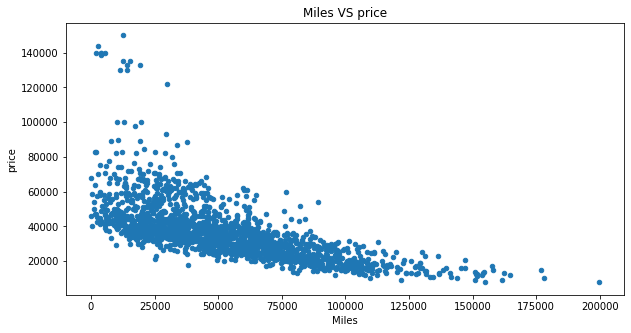

In [18]:
ContinuousCols=['Miles']

for predictor in ContinuousCols:
    voitures.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

### Sélection statistique des caractéristiques (continues Vs continues) à l'aide de la valeur de corrélation

In [20]:

ContinuousCols=['price','Miles']
CorrelationData=voitures[ContinuousCols].corr()

CorrelationData


,price,Miles
price,1.000000,-0.654413
Miles,-0.654413,1.000000


In [20]:
#Filtrage uniquement des colonnes dont la corrélation absolue est > 0,5 avec la variable cible.
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price    1.000000
Miles   -0.654413
Name: price, dtype: float64

Colonnes finales sélectionnées :

Miles.

### Exploration des relations : catégorielles et continues – Boîtes à moustaches

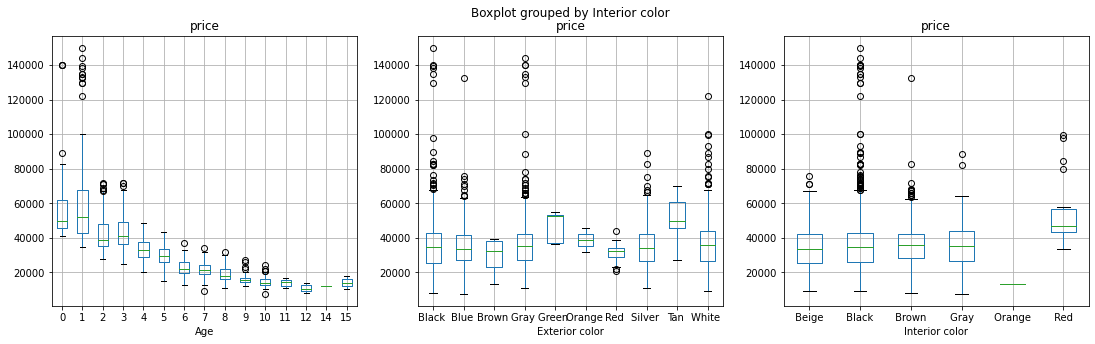

In [21]:
CategoricalColsList=['Age', 'Exterior color', 'Interior color']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    voitures.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

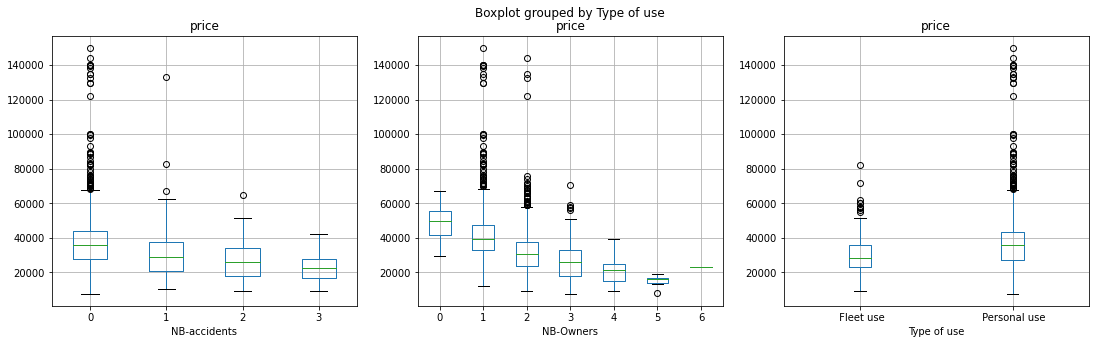

In [22]:

CategoricalColsList=['NB-accidents', 'NB-Owners', 'Type of use']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    voitures.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


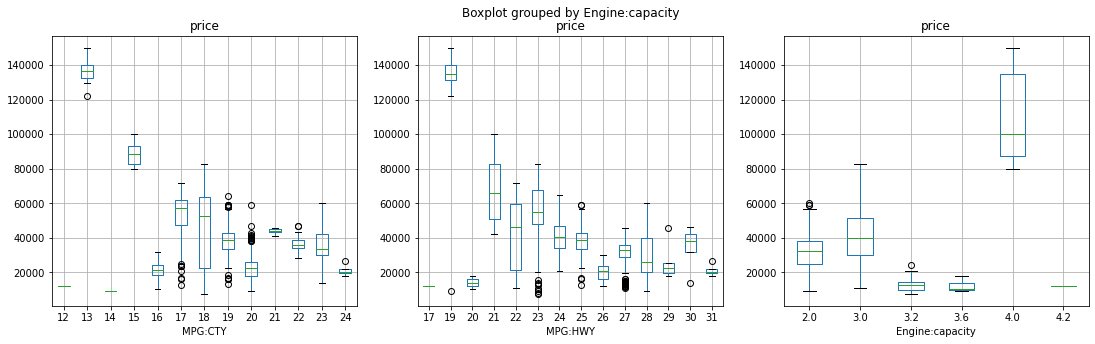

In [23]:

CategoricalColsList=['MPG:CTY', 'MPG:HWY', 'Engine:capacity']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    voitures.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


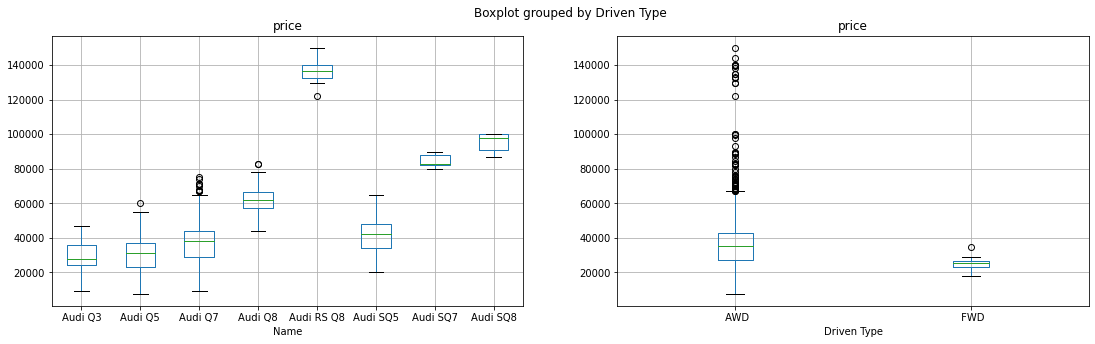

In [24]:

CategoricalColsList=['Name', 'Driven Type']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    voitures.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


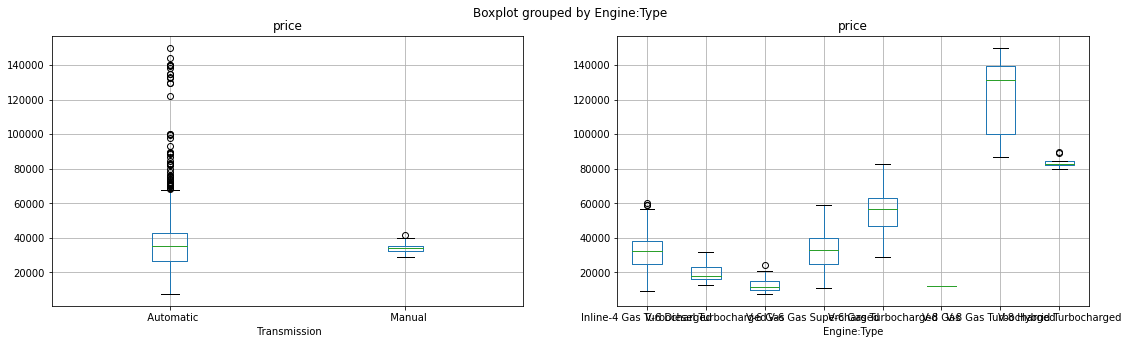

In [25]:

CategoricalColsList=[' Transmission','Engine:Type']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    voitures.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


### Interprétation des boîtes à moustaches

Ces graphiques donnent une idée de la distribution des données du prédicteur continu sur l'axe des Y pour chacune des catégories sur l'axe des X.

Si la distribution semble similaire pour chaque catégorie (les cases sont sur la même ligne), cela signifie que la variable continue n'a aucun effet sur la variable cible. Les variables ne sont donc pas corrélées entre elles.

Sélection finale des colonnes catégorielles :

'Age', 'NB-Owners', 'MPG:CTY', 'MPG:HWY', 'Engine:capacity', 'Name', 'Driven Type', 'Engine:Type'

### Sélection des prédicteurs finaux pour l'apprentissage automatique

Sur la base des tests ci-dessus, sélection des colonnes finales pour ML (machine learning)

In [26]:
#Suppression des colonnes inutiles des données
voitures.drop(['Year'],axis=1,inplace=True)
voitures.drop([' Transmission'],axis=1,inplace=True)
voitures.drop(['Exterior color'],axis=1,inplace=True)
voitures.drop(['Interior color'],axis=1,inplace=True)
voitures.drop(['Type of use'],axis=1,inplace=True)
voitures.drop(['NB-accidents'],axis=1,inplace=True)

In [27]:
voitures.head()

,Name,price,Age,Miles,NB-Owners,MPG:CTY,MPG:HWY,Engine:capacity,Engine:Type,Driven Type
0,Audi Q3,28900.0,4,29390,1,20,28,2.0,Inline-4 Gas Turbocharged,FWD
1,Audi Q7,29999.0,5,70439,2,19,25,3.0,V-6 Gas Supercharged,AWD
2,Audi Q7,40890.0,3,26616,1,19,25,2.0,Inline-4 Gas Turbocharged,AWD
3,Audi Q5,30998.0,3,61183,2,22,27,2.0,Inline-4 Gas Turbocharged,AWD
4,Audi Q3,24500.0,4,46218,2,20,28,2.0,Inline-4 Gas Turbocharged,FWD


## Prétraitement des données pour l'apprentissage automatique

Conversion de la variable nominale en numérique à l'aide de get_dummies()

In [28]:
DataForML=pd.get_dummies(voitures,drop_first=True)
DataForML.head()

,price,Age,Miles,NB-Owners,MPG:CTY,MPG:HWY,Engine:capacity,Name_Audi Q5,Name_Audi Q7,Name_Audi Q8,...,Name_Audi SQ7,Name_Audi SQ8,Engine:Type_V-6 Diesel Turbocharged,Engine:Type_V-6 Gas,Engine:Type_V-6 Gas Supercharged,Engine:Type_V-6 Gas Turbocharged,Engine:Type_V-8 Gas,Engine:Type_V-8 Gas Turbocharged,Engine:Type_V-8 Hybrid Turbocharged,Driven Type_ FWD
0,28900.0,4,29390,1,20,28,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,29999.0,5,70439,2,19,25,3.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,40890.0,3,26616,1,19,25,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,30998.0,3,61183,2,22,27,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24500.0,4,46218,2,20,28,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
DataForML.columns

Index(['price', 'Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD'],
      dtype='object')

### Standardisation/Normalisation des données

Compte tenu de l'utilisation de petits poids dans le modèle et de l'utilisation de l'erreur entre les prédictions et les valeurs attendues, l'échelle des entrées et des sorties utilisées pour former le modèle est un facteur important. Les variables d'entrée non mises à l'échelle peuvent entraîner un processus d'apprentissage lent ou instable, tandis que les variables cibles non mises à l'échelle sur les problèmes de régression peuvent entraîner des gradients explosifs entraînant l'échec du processus d'apprentissage.

In [30]:
# Variable cible et variables prédictives séparées
TargetVariable=['price']
Predictors=['Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# standardisation (z score)
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Stockage de l'objet fit pour référence ultérieure
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

### Division des données en échantillons d'apprentissage et de test

Nous n'utilisons pas les données complètes pour créer le modèle. Certaines données sont sélectionnées au hasard et conservées pour vérifier la qualité du modèle. Ceci est connu sous le nom de données de test et les données restantes sont appelées données d'apprentissage sur lesquelles le modèle est construit.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Vérification de l'intégrité des données échantillonnées
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1638, 21)
(1638, 1)
(182, 21)
(182, 1)


# Création d'un modèle d'apprentissage profond réseaux de neurones (ANN)

## Réglage des hyperparamètres des ANN

Trouver  le nombre optimal de neurones, le nombre optimal de couches, et les meilleures valeurs pour batch_size et epoch est très important car cela affecte directement les performances du modèle. De mauvaises valeurs peuvent entraîner un surajustement (overfitting) ou un sous-ajustement (underfitting).

Il n'y a pas de règle empirique qui puisse vous aider à décider du nombre de couches/nombre de neurones, etc. lors du premier examen des données. Vous devez essayer différents paramètres et choisir la combinaison qui produit la plus grande précision.

Gardez simplement à l'esprit que plus le réseau est grand, plus il est intensif en calcul, donc son exécution prendra plus de temps. Donc toujours pour trouver la meilleure précision avec le minimum de couches/neurones.

Avant cela, nous devrions parler de certains des termes dans l'extrait de code ci-dessous

Dans l'extrait de code ci-dessous, le module "Sequential" de la bibliothèque Keras est utilisé pour créer une séquence de couches ANN empilées les unes après les autres. Chaque couche est définie à l'aide du module "Dense" de Keras où nous spécifions combien de neurones seraient là, quelle technique serait utilisée pour initialiser les poids dans le réseau. quelle sera la fonction d'activation de chaque neurone de cette couche.

Comprenons les hyperparamètres dans les extraits de code.

#### units= 
cela signifie le nombre de neurones dans chaque couche cachée

#### input_dim= 
Cela signifie le nombre de prédicteurs dans les données d'entrée qui sont attendus par la première couche.

#### kernel_initializer=’normal’:
Lorsque les neurones commencent leur calcul, un algorithme doit décider de la valeur de chaque poids. Ce paramètre le précise. Vous pouvez choisir différentes valeurs comme « normal » ou « glorot_uniform ».

#### activation=’relu’:
Ceci spécifie la fonction d'activation pour les calculs à l'intérieur de chaque neurone. Vous pouvez choisir des valeurs comme « relu », « tanh », « sigmoïde », etc.

#### batch_size=
Cela spécifie combien de lignes seront transmises au réseau en une seule fois, après quoi le calcul SSE commencera et le réseau de neurones commencera à ajuster ses poids en fonction des erreurs.

Lorsque toutes les lignes sont passées dans les batches  de lignes, nous appelons cela 1-epoch. Ou un cycle de données complet. Ceci est également connu sous le nom de descente de gradient en mini-batch. Une petite valeur de batch_size incitera l'ANN à regarder les données lentement, comme 2 lignes à la fois ou 4 lignes à la fois, ce qui pourrait entraîner un surajustement (overfitting), par rapport à une grande valeur comme 20 ou 50 lignes à la fois, ce qui faire en sorte que l'ANN examine rapidement les données, ce qui pourrait entraîner un sous-ajustement (underfitting). Par conséquent, une valeur appropriée doit être choisie en utilisant le réglage des hyperparamètres.

#### Epochs=
La même activité d'ajustement des pondérations se poursuit 'epochs' fois. En termes simples, l'ANN examine les données d'entraînement complètes 'epochs' fois et ajuste ses pondérations.

### Trouver le meilleur ensemble de paramètres à l'aide de RandomSearch()

Cette technique nous permet de contrôler le nombre de tentatives de combinaisons d'hyperparamètres. la recherche aléatoire nous permet de spécifier le nombre de modèles à former. Nous pouvons baser nos itérations de recherche sur nos ressources de calcul ou sur le temps pris par itération.

nous allons d'abord essayer de trouver le nombre de couches et de neurones.

In [27]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=1,
                                            max_value=40,
                                            step=1),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mse'])
    return model

In [28]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=50,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

In [31]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 50 Complete [00h 00m 14s]
val_mse: 0.04738420993089676

Best val_mse So Far: 0.040800224989652634
Total elapsed time: 00h 11m 50s
INFO:tensorflow:Oracle triggered exit


#### voir les 10 meilleurs modèles :

In [32]:
tuner.results_summary()

Results summary
Results in project\Air Quality Index
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
units_0: 39
units_1: 23
learning_rate: 0.01
units_2: 1
units_3: 24
units_4: 26
Score: 0.040800224989652634
Trial summary
Hyperparameters:
num_layers: 4
units_0: 14
units_1: 35
learning_rate: 0.01
units_2: 32
units_3: 36
units_4: 13
Score: 0.04738420993089676
Trial summary
Hyperparameters:
num_layers: 4
units_0: 32
units_1: 27
learning_rate: 0.001
units_2: 19
units_3: 27
units_4: 13
Score: 0.048397778222958245
Trial summary
Hyperparameters:
num_layers: 2
units_0: 13
units_1: 27
learning_rate: 0.01
units_2: 14
units_3: 19
units_4: 14
Score: 0.04934419939915339
Trial summary
Hyperparameters:
num_layers: 4
units_0: 35
units_1: 18
learning_rate: 0.01
units_2: 24
units_3: 27
Score: 0.049344694862763085
Trial summary
Hyperparameters:
num_layers: 4
units_0: 29
units_1: 12
learning_rate: 0.01
units_2: 16
units_3: 26
units_4: 32
Score: 0.049913266052802406
Trial summary
Hyperp

#### trouver les autres hyperparamètres : Epochs, Batch

In [61]:
SearchResultsData=pd.DataFrame(columns=['Epochs', 'Batch','random_state', 'MSE'])

for epochs_trail, batch_trail, Rd_state in [[5,5,42],[10,5,42],[50,20,42],[5,5,100],[50,20,100]] :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=Rd_state)
    
    model = Sequential()

    model.add(Dense(units=39, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))


    model.add(Dense(units=23, kernel_initializer='normal', activation='relu'))


    model.add(Dense(1, kernel_initializer='normal'))

    
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.fit(X_train, y_train, verbose=1, epochs = epochs_trail, batch_size=batch_trail,
                   validation_data=(X_test,y_test))
    _, MSE = model.evaluate(X_test,y_test)
    
    SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[epochs_trail, batch_trail, Rd_state, MSE]],
                                                                    columns=['Epochs', 'Batch','random_state', 'MSE'] ))
return(SearchResultsData)   
    

Epoch 1/5
328/328 [==============================] - 1s 3ms/step - loss: 0.3008 - mean_squared_error: 0.3008 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 2/5
328/328 [==============================] - 1s 2ms/step - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 3/5
328/328 [==============================] - 1s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 4/5
328/328 [==============================] - 1s 3ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 5/5
6/6 [==============================] - 0s 0s/step - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 1/10
328/328 [==============================] - 1s 3ms/step - loss: 0.2882 - mean_squared_error: 0.2882 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 2/10
328/328 [==============================] - 1s 2ms/step - loss: 0.0395 - mean_sq

Epoch 36/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 37/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 38/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 39/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 40/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 41/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 42/50
82/82 [===============

Epoch 31/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 32/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 33/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 34/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 35/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 36/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 37/50
82/82 [===============

SyntaxError: 'return' outside function (2477551988.py, line 35)

In [62]:
SearchResultsData

,Epochs,Batch,random_state,MSE
0,5,5,42,0.039260
0,10,5,42,0.040118
0,50,20,42,0.041498
0,5,5,100,0.035155
0,50,20,100,0.036752


d'après le tableau ci-dessus, le meilleur modèle est : 
 le modèle qui a Epochs = 5, Batch = 5, random_state = 100

In [64]:
SearchResultsData=pd.DataFrame(columns=['Epochs', 'Batch','random_state', 'MSE'])

for epochs_trail, batch_trail, Rd_state in [[5,5,42],[10,5,42],[50,20,42],[5,5,100],[50,20,100]] :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=Rd_state)
    
    model = Sequential()

    model.add(Dense(units=13, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))


    model.add(Dense(units=29, kernel_initializer='normal', activation='relu'))


    model.add(Dense(1, kernel_initializer='normal'))

    
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.fit(X_train, y_train, verbose=1, epochs = epochs_trail, batch_size=batch_trail,
                   validation_data=(X_test,y_test))
    _, MSE = model.evaluate(X_test,y_test)
    
    SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[epochs_trail, batch_trail, Rd_state, MSE]],
                                                                    columns=['Epochs', 'Batch','random_state', 'MSE'] ))
return(SearchResultsData)   
    

Epoch 1/5
328/328 [==============================] - 1s 3ms/step - loss: 0.4509 - mean_squared_error: 0.4509 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 2/5
328/328 [==============================] - 1s 3ms/step - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 3/5
328/328 [==============================] - 1s 2ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 4/5
328/328 [==============================] - 1s 2ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 5/5
6/6 [==============================] - 0s 0s/step - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 1/10
328/328 [==============================] - 1s 3ms/step - loss: 0.3899 - mean_squared_error: 0.3899 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 2/10
328/328 [==============================] - 1s 2ms/step - loss: 0.0398 - mean_sq

Epoch 36/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 37/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 38/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 39/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 40/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 41/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 42/50
82/82 [===============

Epoch 31/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 32/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 33/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 34/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 35/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 36/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 37/50
82/82 [===============

SyntaxError: 'return' outside function (3736802127.py, line 35)

In [65]:
SearchResultsData

,Epochs,Batch,random_state,MSE
0,5,5,42,0.049457
0,10,5,42,0.057062
0,50,20,42,0.050324
0,5,5,100,0.036733
0,50,20,100,0.035429


d'après le tableau ci-dessus, le meilleur modèle est : 
 le modèle qui a Epochs = 50, Batch = 20, random_state = 100

In [34]:
SearchResultsData=pd.DataFrame(columns=['Epochs', 'Batch','random_state', 'MSE'])

for epochs_trail, batch_trail, Rd_state in [[5,5,42],[10,5,42],[50,20,42],[5,5,100],[50,20,100]] :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=Rd_state)
    
    model = Sequential()

    model.add(Dense(units=14, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))


    model.add(Dense(units=35, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(units=36, kernel_initializer='normal', activation='relu'))


    model.add(Dense(1, kernel_initializer='normal'))

    
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.fit(X_train, y_train, verbose=1, epochs = epochs_trail, batch_size=batch_trail,
                   validation_data=(X_test,y_test))
    _, MSE = model.evaluate(X_test,y_test)
    
    SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[epochs_trail, batch_trail, Rd_state, MSE]],
                                                                    columns=['Epochs', 'Batch','random_state', 'MSE'] ))
return(SearchResultsData)   
    

Epoch 1/5
328/328 [==============================] - 4s 6ms/step - loss: 0.4232 - mean_squared_error: 0.4232 - val_loss: 0.2011 - val_mean_squared_error: 0.2011
Epoch 2/5
328/328 [==============================] - 2s 5ms/step - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 3/5
328/328 [==============================] - 2s 5ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 4/5
328/328 [==============================] - 2s 5ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 5/5
6/6 [==============================] - 0s 4ms/step - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 1/10
328/328 [==============================] - 4s 6ms/step - loss: 0.3307 - mean_squared_error: 0.3307 - val_loss: 0.1754 - val_mean_squared_error: 0.1754
Epoch 2/10
328/328 [==============================] - 2s 5ms/step - loss: 0.0618 - mean_s

Epoch 36/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 37/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 38/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 39/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 40/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 41/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 42/50
82/82 [===============

Epoch 31/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 32/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 33/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 34/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 35/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 36/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 37/50
82/82 [===============

SyntaxError: 'return' outside function (3581543633.py, line 30)

In [35]:
SearchResultsData

,Epochs,Batch,random_state,MSE
0,5,5,42,0.048857
0,10,5,42,0.042013
0,50,20,42,0.046484
0,5,5,100,0.052303
0,50,20,100,0.037918


d'après le tableau ci-dessus, le meilleur modèle est : 
 le modèle qui a Epochs = 50, Batch = 20, random_state = 100

# Modèles sélectionnés pour l'expérimentation

## Model 1 : 
 random_state=100, epochs=5, batch_size=5, sans régularisation (Dropout) 

In [36]:
TargetVariable=['price']
Predictors=['Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values



PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [37]:
    model = Sequential()

    model.add(Dense(units=39, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))


    model.add(Dense(units=23, kernel_initializer='normal', activation='relu'))


    model.add(Dense(1, kernel_initializer='normal'))

    
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [38]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 39)                858       
                                                                 
 dense_26 (Dense)            (None, 23)                920       
                                                                 
 dense_27 (Dense)            (None, 1)                 24        
                                                                 
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________
None


le modèle contient deux couches cachées, la première couche contient 39 neurones, la deuxième couche contient 23 neurones.

In [39]:
history = model.fit(X_train, y_train, verbose=1, epochs = 5, batch_size=5,
                   validation_data=(X_test,y_test))

Epoch 1/5
328/328 [==============================] - 4s 6ms/step - loss: 0.2799 - mean_squared_error: 0.2799 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 2/5
328/328 [==============================] - 1s 4ms/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 3/5
328/328 [==============================] - 1s 4ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 4/5
328/328 [==============================] - 1s 4ms/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 5/5
328/328 [==============================] - 1s 4ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0423 - val_mean_squared_error: 0.0423


In [40]:
_, MSE = model.evaluate(X_test,y_test)
print("MSE = ", MSE)

6/6 [==============================] - 0s 3ms/step - loss: 0.0423 - mean_squared_error: 0.0423
MSE =  0.04232645407319069


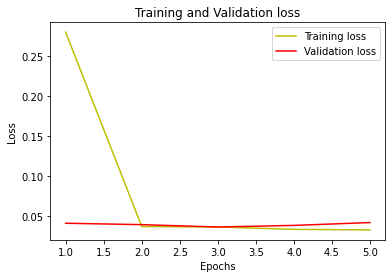

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Nous pouvons clairement voir une divergence de la fonction de perte dans les données de test.

# Model 2 : 
 random_state=100, epochs=50, batch_size=20, sans régularisation (Dropout) 

In [48]:
TargetVariable=['price']
Predictors=['Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values



PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [49]:
model = Sequential()

model.add(Dense(units=13, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))


model.add(Dense(units=29, kernel_initializer='normal', activation='relu'))


model.add(Dense(1, kernel_initializer='normal'))

#optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [50]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 13)                286       
                                                                 
 dense_32 (Dense)            (None, 29)                406       
                                                                 
 dense_33 (Dense)            (None, 1)                 30        
                                                                 
Total params: 722
Trainable params: 722
Non-trainable params: 0
_________________________________________________________________
None


le modèle contient deux couches cachées, la première couche contient 13 neurones, la deuxième couche contient 29 neurones.

In [51]:
history = model.fit(X_train, y_train, verbose=1, epochs = 50, batch_size=20,
                   validation_data=(X_test,y_test))

Epoch 1/50
82/82 [==============================] - 2s 11ms/step - loss: 0.8248 - mean_squared_error: 0.8248 - val_loss: 0.4595 - val_mean_squared_error: 0.4595
Epoch 2/50
82/82 [==============================] - 0s 5ms/step - loss: 0.2451 - mean_squared_error: 0.2451 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 3/50
82/82 [==============================] - 0s 5ms/step - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 4/50
82/82 [==============================] - 0s 5ms/step - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 5/50
82/82 [==============================] - 0s 5ms/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 6/50
82/82 [==============================] - 0s 5ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 7/50
82/82 [=====================

In [52]:
_, MSE = model.evaluate(X_test,y_test)
print("MSE = ", MSE)

6/6 [==============================] - 0s 2ms/step - loss: 0.0363 - mean_squared_error: 0.0363
MSE =  0.03629586473107338


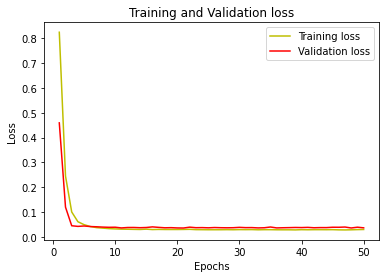

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

la fonction de perte dans les données d'apprentissage et de test est corrélée et approximativement constante

# Model 3 : 
random_state=100, epochs=50, test_size=0.10, batch_size=20, sans régularisation (Dropout)

In [54]:
TargetVariable=['price']
Predictors=['Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()


PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [55]:
model = Sequential()

model.add(Dense(units=14, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))


model.add(Dense(units=35, kernel_initializer='normal', activation='relu'))
    
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
    
model.add(Dense(units=36, kernel_initializer='normal', activation='relu'))


model.add(Dense(1, kernel_initializer='normal'))

#optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [56]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 14)                308       
                                                                 
 dense_35 (Dense)            (None, 35)                525       
                                                                 
 dense_36 (Dense)            (None, 32)                1152      
                                                                 
 dense_37 (Dense)            (None, 36)                1188      
                                                                 
 dense_38 (Dense)            (None, 1)                 37        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
None


le modèle contient quatre couches cachées, la première couche contient 14 neurones, la deuxième couche contient 35 neurones, la troisième contient 32 neurones et la quatrième contient 36 neurones.

In [57]:
history = model.fit(X_train, y_train, verbose=1, epochs = 50, batch_size=20,
                   validation_data=(X_test,y_test))

Epoch 1/50
82/82 [==============================] - 3s 12ms/step - loss: 0.7928 - mean_squared_error: 0.7928 - val_loss: 0.2758 - val_mean_squared_error: 0.2758
Epoch 2/50
82/82 [==============================] - 0s 6ms/step - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.0597 - val_mean_squared_error: 0.0597
Epoch 3/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 4/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 5/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 6/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 7/50
82/82 [=====================

In [58]:
_, MSE = model.evaluate(X_test,y_test)
print("MSE = ", MSE)

6/6 [==============================] - 0s 3ms/step - loss: 0.0375 - mean_squared_error: 0.0375
MSE =  0.03751213103532791


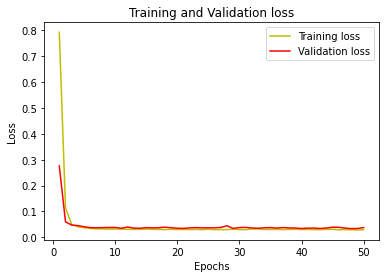

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model 4

random_state=100, epochs=50, batch_size=10, avec régularisation (Dropout)

In [61]:
TargetVariable=['price']
Predictors=['Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values




PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [62]:
model = Sequential()

model.add(Dense(units=13, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(units=29, kernel_initializer='normal', activation='relu'))


model.add(Dense(1, kernel_initializer='normal'))

#optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [63]:
history = model.fit(X_train, y_train, verbose=1, epochs = 50, batch_size=10,
                   validation_data=(X_test,y_test))

Epoch 1/50
164/164 [==============================] - 3s 7ms/step - loss: 0.6948 - mean_squared_error: 0.6948 - val_loss: 0.3363 - val_mean_squared_error: 0.3363
Epoch 2/50
164/164 [==============================] - 1s 5ms/step - loss: 0.1534 - mean_squared_error: 0.1534 - val_loss: 0.0702 - val_mean_squared_error: 0.0702
Epoch 3/50
164/164 [==============================] - 1s 5ms/step - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 4/50
164/164 [==============================] - 1s 5ms/step - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 5/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 6/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 7/50
164/164 [========

In [64]:
_, MSE = model.evaluate(X_test,y_test)
print("MSE = ", MSE)

6/6 [==============================] - 0s 3ms/step - loss: 0.0534 - mean_squared_error: 0.0534
MSE =  0.053359899669885635


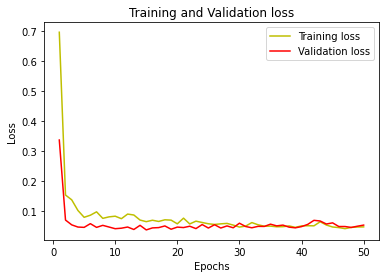

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

il y a des fluctuations dans la fonction de perte dans les données de test et d'entraînement, alors ce module n'est pas bien.

# Prediction : Model 2

Parmi ces 4 modules, le meilleur module est le module deux, car les fonctions de perte pour les données d'apprentissage et de test sont corrélées et approximativement constantes, plus le module a la faible valeur de MSE

In [32]:
TargetVariable=['price']
Predictors=['Age', 'Miles', 'NB-Owners', 'MPG:CTY', 'MPG:HWY',
       'Engine:capacity', 'Name_Audi Q5', 'Name_Audi Q7', 'Name_Audi Q8',
       'Name_Audi RS Q8', 'Name_Audi SQ5', 'Name_Audi SQ7', 'Name_Audi SQ8',
       'Engine:Type_V-6 Diesel Turbocharged', 'Engine:Type_V-6 Gas',
       'Engine:Type_V-6 Gas Supercharged', 'Engine:Type_V-6 Gas Turbocharged',
       'Engine:Type_V-8 Gas', 'Engine:Type_V-8 Gas Turbocharged',
       'Engine:Type_V-8 Hybrid Turbocharged', 'Driven Type_ FWD']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()


PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)


X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import keras

model = Sequential()

model.add(Dense(units=13, input_dim=X_train.shape[-1], kernel_initializer='normal', activation='relu'))


model.add(Dense(units=29, kernel_initializer='normal', activation='relu'))


model.add(Dense(1, kernel_initializer='normal'))


model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])


model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)


Predictions=model.predict(X_test)


Predictions=TargetVarScalerFit.inverse_transform(Predictions)


y_test_orig=TargetVarScalerFit.inverse_transform(y_test)


Test_Data=PredictorScalerFit.inverse_transform(X_test)


TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['price']=y_test_orig
TestingData['Predictedprice']=Predictions
TestingData.head()

Epoch 1/50
82/82 [==============================] - 1s 3ms/step - loss: 0.8384 - mean_squared_error: 0.8384
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 3/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 4/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 5/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 7/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 8/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 9/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 10/50
82/82 [=========

,Age,Miles,NB-Owners,MPG:CTY,MPG:HWY,Engine:capacity,Name_Audi Q5,Name_Audi Q7,Name_Audi Q8,Name_Audi RS Q8,...,Engine:Type_V-6 Diesel Turbocharged,Engine:Type_V-6 Gas,Engine:Type_V-6 Gas Supercharged,Engine:Type_V-6 Gas Turbocharged,Engine:Type_V-8 Gas,Engine:Type_V-8 Gas Turbocharged,Engine:Type_V-8 Hybrid Turbocharged,Driven Type_ FWD,price,Predictedprice
0,5.0,85218.0,1.0,19.0,25.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28680.0,29654.763672
1,3.0,29007.0,1.0,22.0,27.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34777.0,36365.398438
2,4.0,46701.0,1.0,19.0,25.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36880.0,37024.785156
3,3.0,65138.0,1.0,22.0,27.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31987.0,31688.783203
4,8.0,68105.0,2.0,16.0,22.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26998.0,22800.316406


In [34]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                286       
                                                                 
 dense_1 (Dense)             (None, 29)                406       
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 722
Trainable params: 722
Non-trainable params: 0
_________________________________________________________________
None


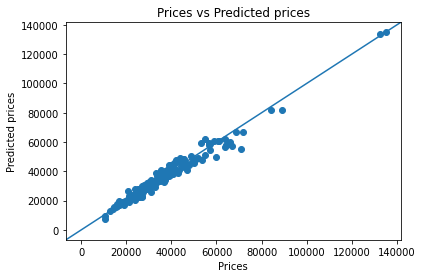

In [42]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test_orig, Predictions)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.axline((0, 0), slope=1)
plt.show()

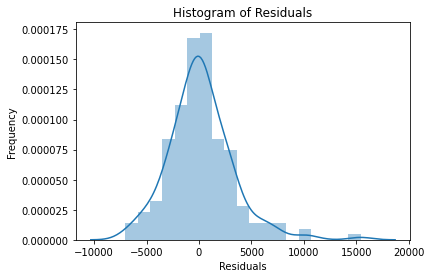

In [36]:
sns.distplot(y_test_orig-Predictions)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

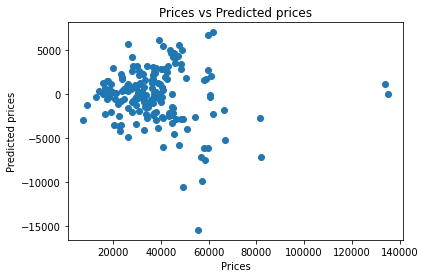

In [37]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Predictions, Predictions-y_test_orig)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# RMSE

In [38]:
diff=np.subtract(y_test_orig, Predictions)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 3103.901809189714


# R^2

In [40]:
def performance_metric(y_true, y_predict):
    """ Calcule et renvoie le score de performance entre 
        valeurs vraies et prédites en fonction de la métrique choisie. """
    
    # Calculer le score de performance entre 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Rendre le score
    return score

In [41]:
R_2 = performance_metric(y_test_orig, Predictions)
print("R-Squared:", R_2)

R-Squared: 0.9680049091892514
